In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2


from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Soilit/picture_dataset/soil_training'
valid_path = '/content/drive/MyDrive/Soilit/picture_dataset/soil_test'

In [7]:
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [8]:
# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [10]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

# our layers - you can add more if you want
x = Flatten()(mobilenet.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [14]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Soilit/picture_dataset/soil_training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1158 images belonging to 11 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Soilit/picture_dataset/soil_test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1148 images belonging to 11 classes.


In [17]:
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(training_set.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [18]:
for layer in base_model.layers:
    layer.trainable = False

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    training_set,
    epochs=10,
    validation_data=test_set
)

Epoch 1/10
27/37 [====================>.........] - ETA: 1:41 - loss: 2.3459 - accuracy: 0.2220

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


37/37 [==============================] - 732s 20s/step - loss: 2.2447 - accuracy: 0.2642 - val_loss: 1.8133 - val_accuracy: 0.4364
Epoch 2/10
37/37 [==============================] - 51s 1s/step - loss: 1.6946 - accuracy: 0.4542 - val_loss: 1.4631 - val_accuracy: 0.5453
Epoch 3/10
37/37 [==============================] - 50s 1s/step - loss: 1.3249 - accuracy: 0.5829 - val_loss: 1.1802 - val_accuracy: 0.6324
Epoch 5/10
37/37 [==============================] - 50s 1s/step - loss: 1.2712 - accuracy: 0.6088 - val_loss: 1.1576 - val_accuracy: 0.6376
Epoch 6/10
37/37 [==============================] - 51s 1s/step - loss: 1.1759 - accuracy: 0.6399 - val_loss: 1.0888 - val_accuracy: 0.6603
Epoch 7/10
37/37 [==============================] - 51s 1s/step - loss: 1.0932 - accuracy: 0.6580 - val_loss: 1.0752 - val_accuracy: 0.6472
Epoch 8/10
37/37 [==============================] - 50s 1s/step - loss: 1.0240 - accuracy: 0.6736 - val_loss: 0.9110 - val_accuracy: 0.7143
Epoch 9/10
37/37 [===========

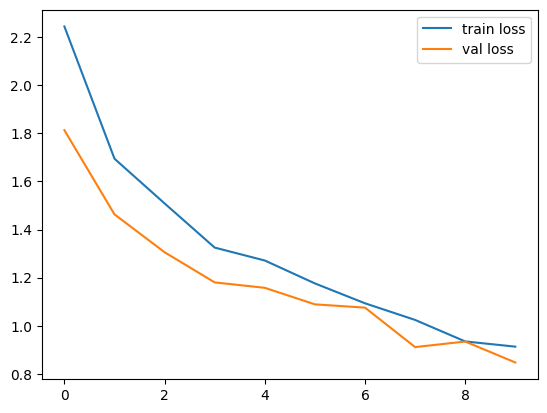

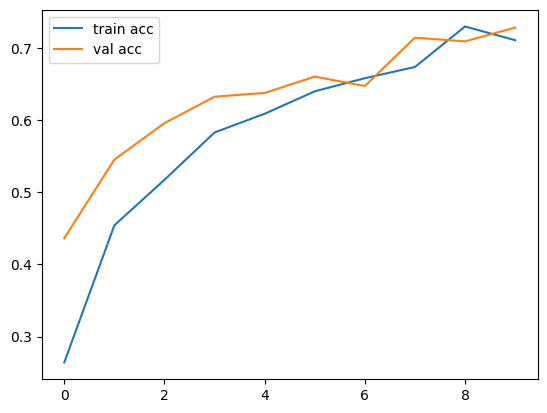

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
from tensorflow.keras.models import save_model

# Save the model as an h5 file
save_model(model, 'model_mobilenetv2.h5')

In [28]:
y_pred = model.predict(test_set)

14/36 [==========>...................] - ETA: 12s

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


36/36 [==============================] - 21s 545ms/step


In [29]:
y_pred

array([[7.94953480e-03, 2.44868970e-05, 3.84634950e-05, ...,
        1.84551075e-01, 4.50343214e-04, 6.12417422e-03],
       [5.30852526e-02, 6.91733044e-03, 1.78341437e-02, ...,
        2.80561089e-03, 1.21044725e-01, 9.60135832e-03],
       [1.96429039e-03, 9.65613723e-01, 7.38140196e-04, ...,
        3.56883253e-03, 1.83165004e-03, 1.45738875e-03],
       ...,
       [7.20285985e-04, 1.75216375e-03, 2.01644818e-03, ...,
        4.33760276e-03, 4.79188311e-05, 1.61952805e-02],
       [2.66456138e-02, 5.39997302e-04, 1.75558648e-03, ...,
        1.55972838e-02, 5.29118218e-02, 3.09536979e-02],
       [1.87238052e-01, 5.60363643e-02, 1.75496221e-01, ...,
        2.27347296e-02, 1.06184542e-01, 1.22472726e-01]], dtype=float32)

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([3, 7, 1, ..., 5, 3, 0])

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

model = load_model('model_mobilenetv2.h5')
img_data = image.load_img('/content/drive/MyDrive/jenis-tanah-grumusol.webp', target_size=(224, 224))
img_array = image.img_to_array(img_data)
preprocessed_img = preprocess_input(img_array)
preprocessed_img = np.expand_dims(preprocessed_img, axis=0)

# Make predictions using the MobileNetV2 model
predictions = model.predict(preprocessed_img)

1/1 [==============================] - 1s 805ms/step


In [40]:
import numpy as np

# Assuming you have already loaded and preprocessed the image and made predictions
predictions = model.predict(preprocessed_img)
predicted_class_index = np.argmax(predictions)
class_labels = ['aluvial', 'gambut ', 'humus', 'laterit', 'litosol', 'kapur', 'liat', 'organosol', 'pasir', 'regosol', 'vulkanik']  # Replace with your own class labels

predicted_class_label = class_labels[predicted_class_index]
predicted_probability = predictions[0][predicted_class_index]

print("Predicted class:", predicted_class_label)
print("Probability:", predicted_probability)

1/1 [==============================] - 0s 25ms/step
Predicted class: vulkanik
Probability: 0.9588828


In [42]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [43]:
# Assuming you have already trained your model and have access to the class labels

# Define your class labels
class_labels = ['aluvial', 'gambut ', 'humus', 'laterit', 'litosol', 'kapur', 'liat', 'organosol', 'pasir', 'regosol', 'vulkanik']  # Replace with your own class labels

# Save the class labels to the labels.txt file
with open('labels.txt', 'w') as f:
    for label in class_labels:
        f.write(label + '\n')